# Correction des exercices abordés pendant le cours

Pour chacun des exercices :

1. Plusieurs méthodes peuvent arriver au même résultat
2. Nous ne mettons pas les étapes intermédiaires mais uniquement le code final

## Exercice 1 (Séance 2)

1. Écrire un script qui stocke dans un fichier les titres d'articles contenus dans le fichier articles_ig_monde.csv qui comprennent le terme "islamo"
2. Écrire une fonction qui compte le nombre de mots de plus de deux lettres contenu dans une phrase
3. Modifier la fonction précédente pour qu'elle compte le nombre de mots uniques de la phrase

**Question 1 : lire un fichier, trier par le titre, et sauvegarder**

In [5]:
# Lire les données
with open("./Data/articles_ig_monde.csv","r") as f: #ouverture en mode lecture
    corpus = f.readlines()
print("Nombre de lignes du fichier: ",len(corpus))

# Tester la présence d'une chaîne de caractères dans chaque lige et si oui, mettre la ligne dans une nouvelle liste
nouveau_corpus = []
for i in corpus:
    if "islamo" in i:
        nouveau_corpus.append(i)
print("Nombre de lignes du nouveau corpus: ",len(nouveau_corpus))

# Écrire dans un nouveau fichier
with open("./Data/corpus.csv","w") as f: #ouverture en mode écriture
    f.writelines(nouveau_corpus)

Nombre de lignes du fichier:  23
Nombre de lignes du nouveau corpus:  8


Attention : ce code ne met pas le contenu en minuscule, et ne détecte qu'un motif

**Question 2 : écrire une fonction qui découpe les phrases en mots, et ne garde que les mots de plus de deux lettres**

In [6]:
def compter_mots_sup_2(phrase):
    mots = phrase.split(" ") # Couper aux espaces
    mots_sup_2 = []
    for m in mots:
        if len(m) > 2 : # Si plus de deux lettres
            mots_sup_2.append(m)
            
    # Retourner le nombre d'éléments
    return len(mots_sup_2)

In [7]:
# Tester
compter_mots_sup_2("Combien de mots de plus de deux lettres ?")

5

**Question 3 : Modifier la fonction précédente pour qu'elle compte le nombre de mots uniques de la phrase**

Plusieurs interprétation pour cette consigne. Ici ce sera le nombre de mots différents. Une autre manière de l'interpréter est le nombre de mots apparaissant une seule fois : voir le notebook *Milles façons de résoudre un problème.ipynb*

On utilise l'astuce que le type de données *set* contient une fois chaque élément d'un ensemble

In [8]:
def nombre_mots_differents(phrase):
    mots = phrase.split(" ") # Couper aux espaces
    return len(set(mots))

In [10]:
# Tester
nombre_mots_differents("Je me demande : il y a combien de mots différents dans cette phrase ?")

15

Attention : pour l'instant, pas de gestion des majuscules, de la ponctuation, etc.

## Exercice 2 (De la séance 2 à la séance 3)

vous avez un jeu de données (articles.zip ; compressées, donc à décompresser) qui contiennent tous les articles du Monde, quotidien français, sur une période, mentionnant le terme "islamogauchisme".

L'objectif est de construire un unique fichier CSV qui comprend : la date de l'article, son titre, le nombre de mots qu'il contient, et le nombre de fois où le terme "islamogauchisme" ou "islamo-gauchisme" est contenu.

Aide: vous avez toutes les briques de base pour faire cela, sauf peut-être le module os, à importer (import os), et qui a une fonction listant le contenu d'un dossier (os.listdir("./dossier")).

**Cet exercice a été résolu au début de la séance 3**

In [19]:
# Définition d'une fonction qui compte le nombre de présence d'un terme
def compter(x):
    mots = ["islamogauchisme","islamo-gauchisme"]
    total = 0
    for m in mots:
        total+=x.lower().count(m)
    return total

In [25]:
# Importation d'une bibliothèque pour lister les fichiers
import os

# Création d'un corpus vide
corpus = []

# Ouvrir chaque fichier du dossier
for i in os.listdir("./Data/articles/"):
    
    # Ouvrir le fichier
    chemin_fichier = "./Data/articles/"+i
    with open(chemin_fichier,"r") as f:
        contenu = f.read()
        
    # Mettre en forme l'information
    date = i[0:10] # La date correspond aux 10 premiers caractères du nom de fichier
    titre = i[11:] # Le titre correspond au reste 
    mots = contenu.split(" ")
    total_ig = compter(contenu) # Utiliser la fonction que nous avons défini
    corpus.append([date,titre,contenu,total_ig,len(mots)])
    
# Écrire dans un fichier
with open("./Data/corpus.csv","w") as f:
    for article in corpus:
        ligne = [str(i) for i in article] # Passage de tous les éléments en string
        f.write(";".join(ligne))

## Exercice 3

1. Dans le tableau d'articles (corpus), ajouter une colonne qui correspond à la présence ou absence dans le titre du terme "islamo-gauchisme"
2. Est-ce que les articles qui ont le terme dans le titre ont une taille ou une fréquence du terme différents de ceux qui ne le mentionnent pas dans le titre (proposer une représentation visuelle)
3. Tracer une courbe d'évolution temporelle du nombre d'articles par journal

**Question 1 : créer une nouvelle colonne**

Indice : utiliser apply et créer une fonction dédiée pour détecter la présence du terme

In [5]:
import pandas as pd
data = pd.read_excel("./Data/tableau_statistiques.xlsx")

data["Titre_min"] = data["Titre"].str.lower()

In [15]:
data["presence_islamo_titre"] = data["Titre_min"].str.contains("islamo-gauch")

In [18]:
def presence_islamo(texte):
    texte = texte.lower()
    return ("islamo-gauch" in texte)

In [23]:
data["Titre"].apply(presence_islamo)

0       True
1       True
2       True
3       True
4      False
       ...  
166    False
167    False
168    False
169    False
170    False
Name: Titre, Length: 171, dtype: bool

**Question 2 : faire des statistiques par catégories**

Indice : soit filtrer les deux sous corpus et calculer les indicateurs ; soit utiliser groupby

**Question 3 [COMPLEXE] : tracer une courbe**

Indice : passer la date en index, rajouter une colonne valant 1, puis resample cette série par jours avec une somme comme agrégation et visualiser

In [32]:
data["Date-reco"] = pd.to_datetime(data["Date-reco"])

In [27]:
case1 = data["Date-reco"].iloc[0]

In [30]:
case1.month

2

In [35]:
data = data.set_index("Date-reco")

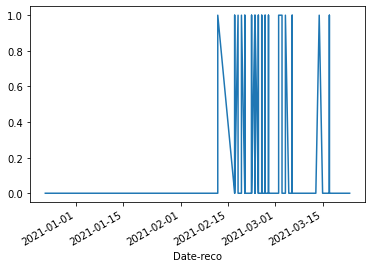

In [43]:
data["presence_islamo_titre"].replace({True:1,False:0}).plot()

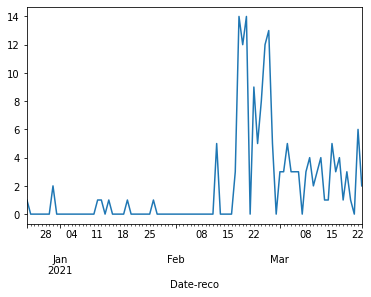

In [50]:
data["presence_islamo_titre"].resample("d").count().plot()

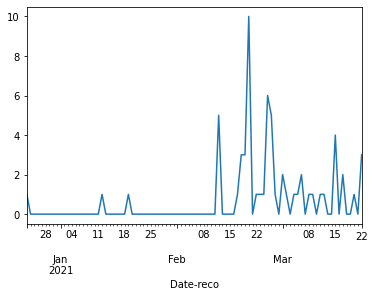

In [55]:
data[data["Journal"]=="Figaro"]["presence_islamo_titre"].resample("d").count().plot()

In [59]:
len(data["Journal"].unique())

8

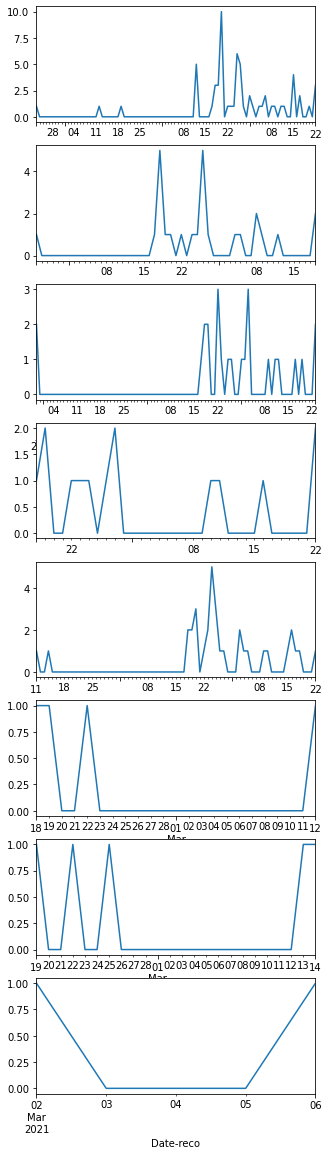

In [63]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(8,1,figsize=(5,20))
figure = 0
for j in data["Journal"].unique():
    data[data["Journal"]==j]["presence_islamo_titre"].resample("d").count().plot(ax=ax[figure])
    figure+=1

## Exercice 4

1. Étudier l'effet du positionnement politique sur les deux variables d'intérêt, intérêt science et apport science
2. Faire une régression logistique avec comme variable dépendante les personnes intéressées par la science
3. Proposer une analyse des réponses recodées du champ libre sur ce qu'est la science (m_q29_1 à m_q29_29) :
(par ex, ACM / classification) -> voir fin du document de la séance 4

Chargement des données

In [6]:
import pyreadstat
import pandas as pd
data2011, meta2011 = pyreadstat.read_sav('./Data/fr.cdsp.ddi.sav')

def question(v,meta):
    return meta2011.column_names_to_labels[v]

def modalites(v,meta):
    return meta.value_labels[meta.variable_to_label[v]]

data2011["interetscience"] = data2011['q2'].replace({1:"Oui",2:"Oui",3:"Non",4:"Non"})
data2011["apportscience"] = data2011['q15'].replace(modalites('q15',meta2011))
data2011["politique"] = data2011["rs16"].replace({1.0: 'Extrême gauche',
 2.0: 'Gauche',
 3.0: 'Gauche',
 4.0: '.Centre',
 5.0: 'Droite',
 6.0: 'Droite',
 7.0: 'Extrême droite',
 888.0: 'Ne sait pas'})
data2011["sexe"] = data2011["rs1"].replace(modalites("rs1",meta2011))
data2011["age_reco"] = pd.cut(data2011['rs2'],[0,35,45,55,65,100],
                labels = ["[18-35[","[35-45[","[45-55[","[55-65[","[65-75]"])
data2011["pcs"] = data2011["pcsip"].replace(modalites("pcsip",meta2011))

# Dichotomiser la variable
data2011["apportsciencepositif"] = data2011["apportscience"].apply(lambda x : 1 if x == "Plus de bien que de mal" else 0)


In [7]:
import pyshs

In [9]:
pyshs.regression_logistique(data2011,"apportsciencepositif",["sexe","age_reco"])

Odds Ratio        p            IC 95%
Variable   Modalité                                      
.Intercept                0.44   0.0***  0.44 [0.34-0.57]
age_reco   [18-35[         ref                           
           [35-45[        1.19    0.354  1.19 [0.82-1.73]
           [45-55[        1.33     0.18  1.33 [0.88-2.01]
           [55-65[         1.5   0.033*  1.50 [1.03-2.17]
           [65-75]        1.68  0.007**  1.68 [1.15-2.45]
sexe       Femme           ref                           
           Homme          1.41  0.009**  1.41 [1.09-1.81]